# Level 3

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\Manikanta\Downloads\Dataset .csv")

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Display the number of rows and columns
df.shape

(9551, 21)

In [6]:
#Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
#Drop rows with missing values
df.dropna(inplace=True)

In [8]:
#After handling missing values
df.shape

(9542, 21)

## Task 1: Predictive Modeling

In [13]:
# Considering some potential features
selected_features = ['Average Cost for two', 'Price range', 'Votes']

In [14]:
X = df[selected_features]
y = df['Aggregate rating']

In [15]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Build the regression model (Linear Regression as an example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict aggregate ratings on the test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [19]:
# Mean Squared Error
mse

1.7193421524563215

In [20]:
# Root Mean Squared Error
rmse

1.3112368788500122

In [21]:
# R^2 Score
r2

0.24920612400080278

In [25]:
# Initialize and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [26]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R^2': r2}

In [28]:
# Print results
print("Regression Model Performance:")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"R^2: {metrics['R^2']:.2f}")
    print("-----------------------")

Regression Model Performance:
Model: Linear Regression
MSE: 1.72
RMSE: 1.31
R^2: 0.25
-----------------------
Model: Decision Tree
MSE: 0.20
RMSE: 0.44
R^2: 0.91
-----------------------
Model: Random Forest
MSE: 0.14
RMSE: 0.37
R^2: 0.94
-----------------------


## Task 2: Customer Preference Analysis

In [29]:
# Group the data by cuisine and calculate the average rating for each cuisine
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

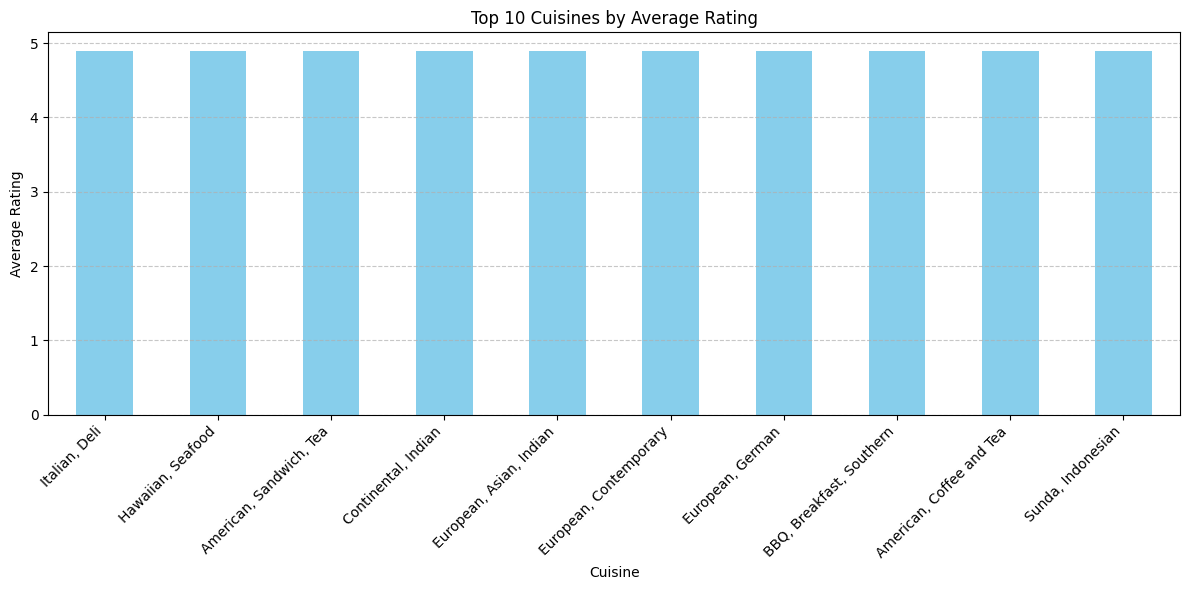

In [30]:
# Plot the top cuisines by average rating
plt.figure(figsize=(12, 6))
avg_rating_by_cuisine.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
# Group the data by cuisine and calculate the total number of votes for each cuisine
total_votes_by_cuisine = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

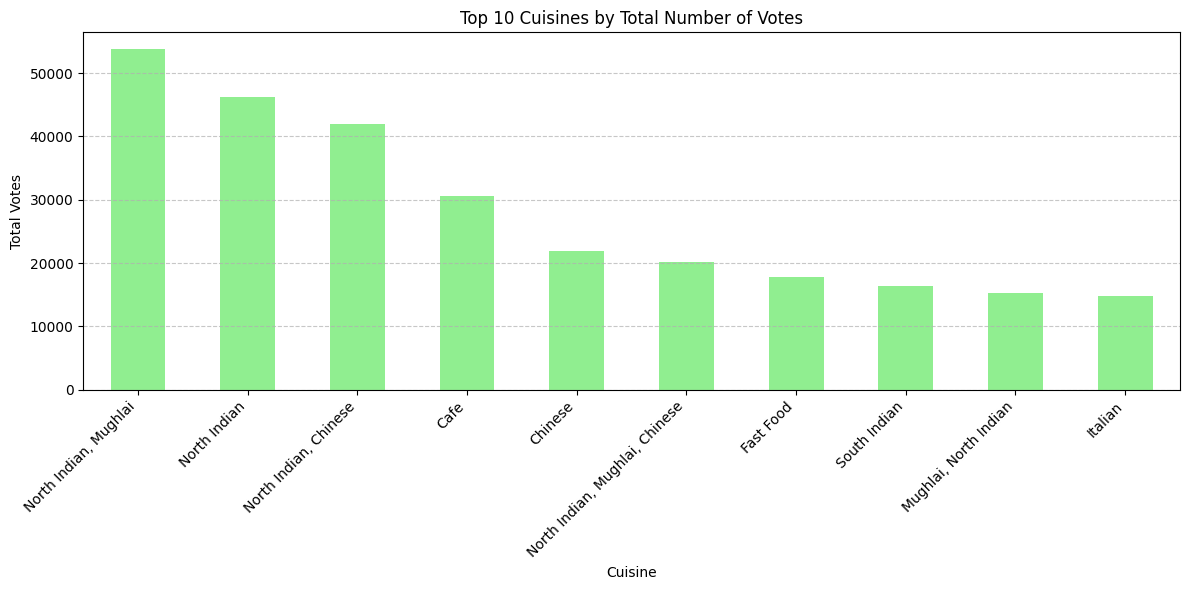

In [32]:
# Plot the top cuisines by total number of votes
plt.figure(figsize=(12, 6))
total_votes_by_cuisine.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cuisines by Total Number of Votes')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

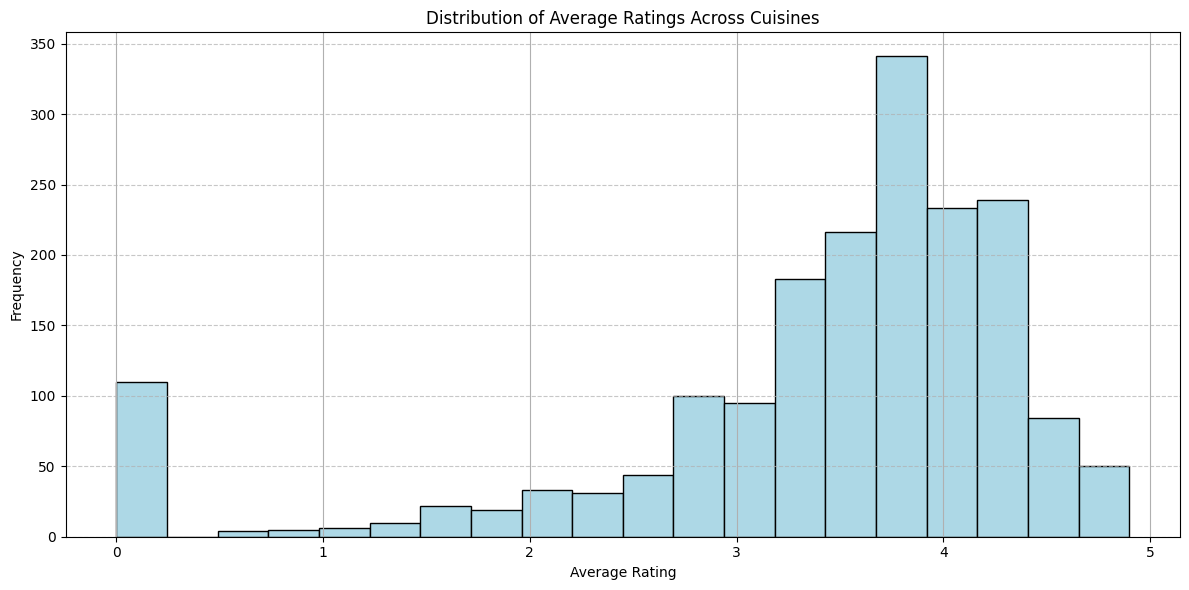

In [33]:
# Plot the distribution of average ratings across cuisines
plt.figure(figsize=(12, 6))
avg_rating_by_cuisine.hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Average Ratings Across Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Task 3: Data Visualization

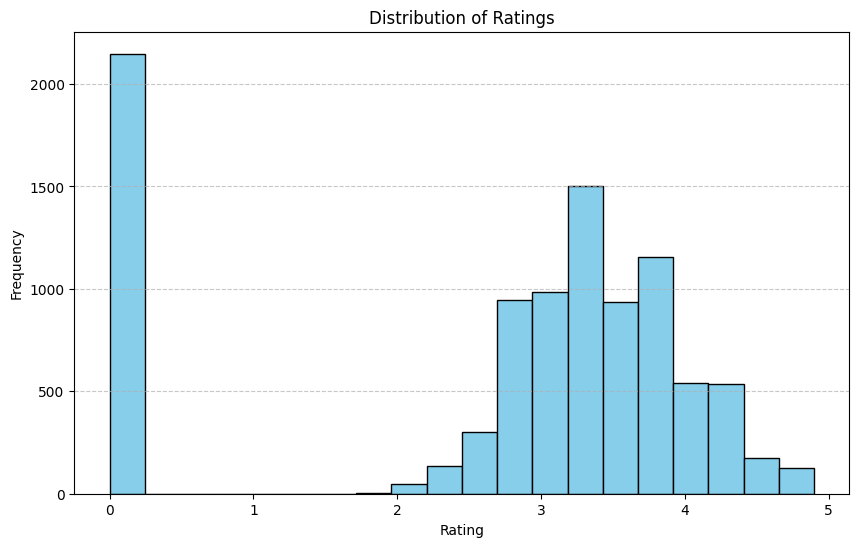

In [34]:
# Create a histogram to represent the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

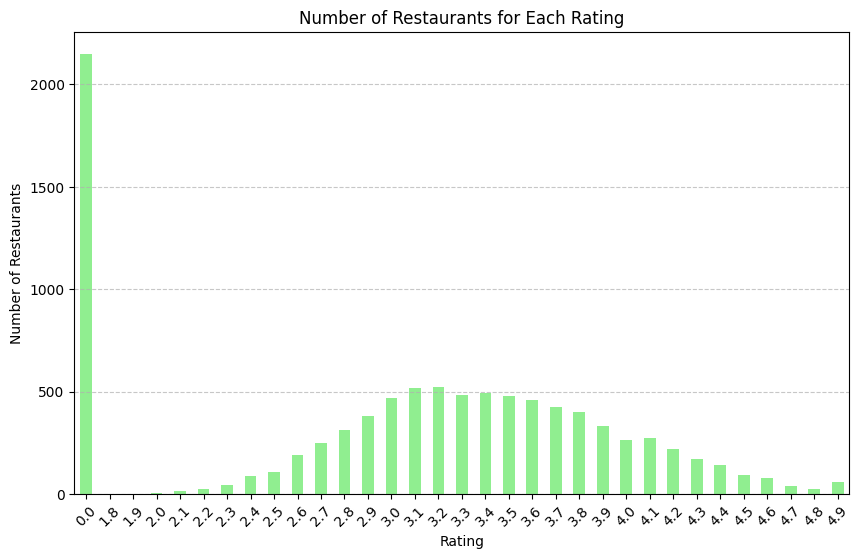

In [35]:
# Create a bar plot to represent the number of restaurants for each rating
plt.figure(figsize=(10, 6))
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Number of Restaurants for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

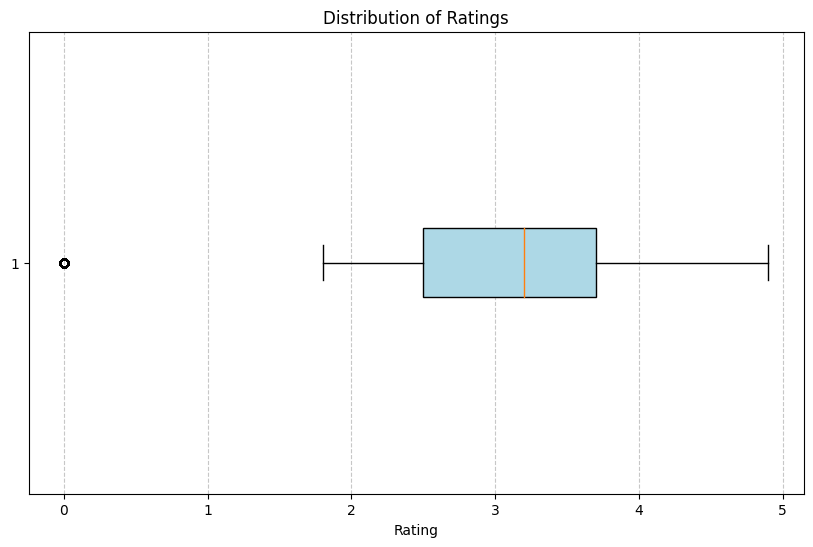

In [36]:
# Create a box plot to represent the distribution of ratings
plt.figure(figsize=(10, 6))
plt.boxplot(df['Aggregate rating'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

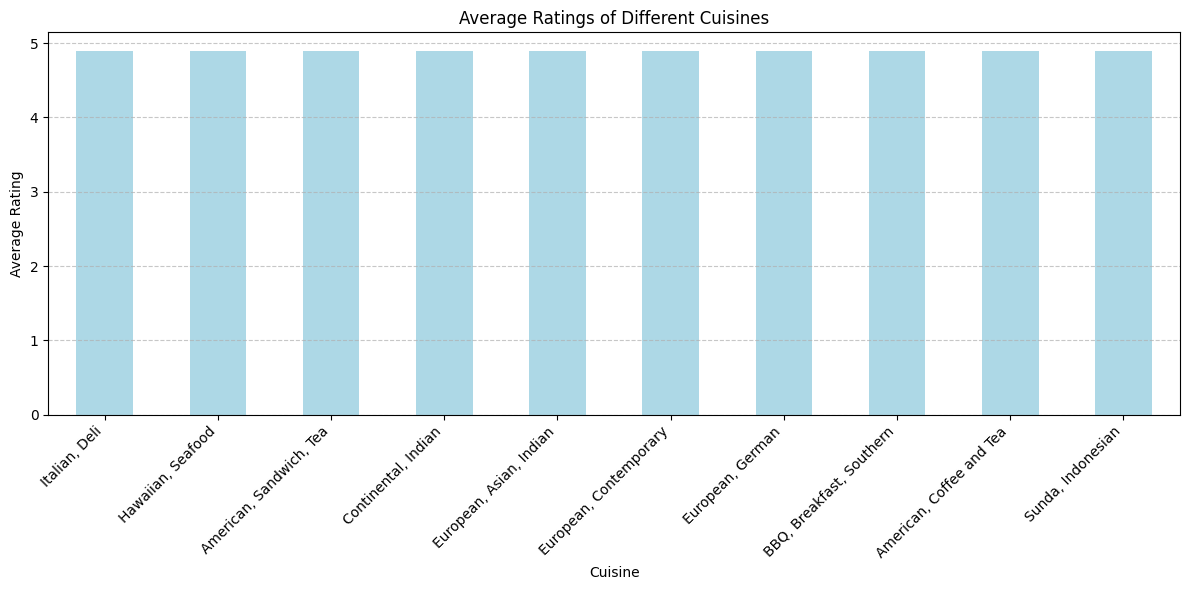

In [37]:
# Plot the average ratings of different cuisines
plt.figure(figsize=(12, 6))
avg_rating_by_cuisine.head(10).plot(kind='bar', color='lightblue')
plt.title('Average Ratings of Different Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
# Calculate the average rating for each city
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

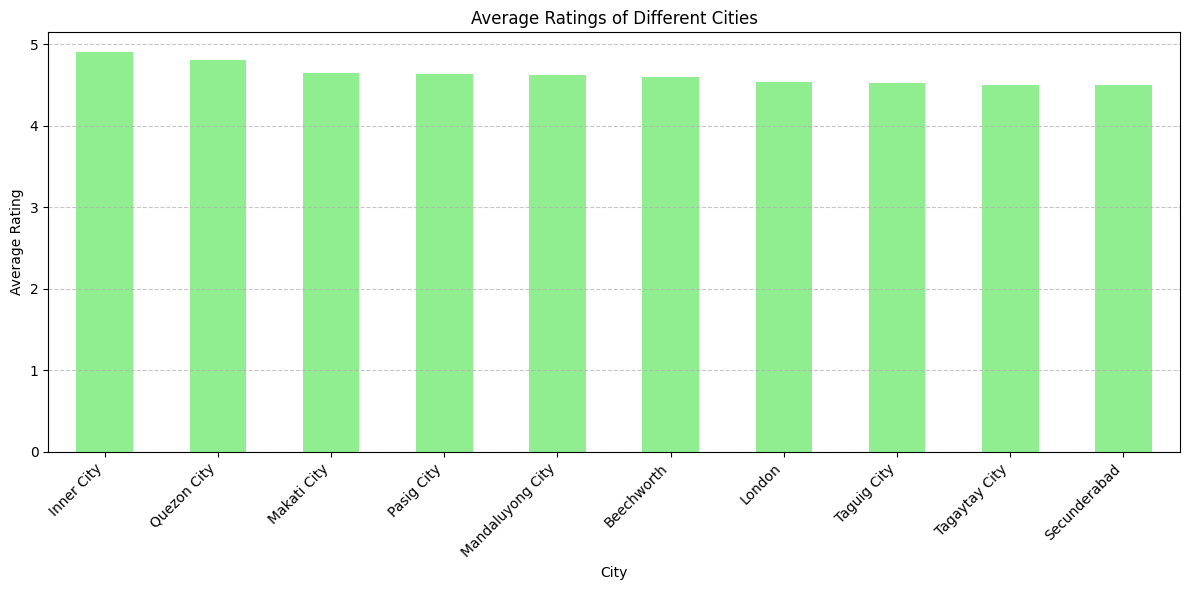

In [40]:
# Plot the average ratings of different cities
plt.figure(figsize=(12, 6))
avg_rating_by_city.head(10).plot(kind='bar', color='lightgreen')
plt.title('Average Ratings of Different Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
# Visualize numerical features vs. target variable (aggregate rating)
num_features = ['Average Cost for two', 'Votes']  # Add more numerical features if needed

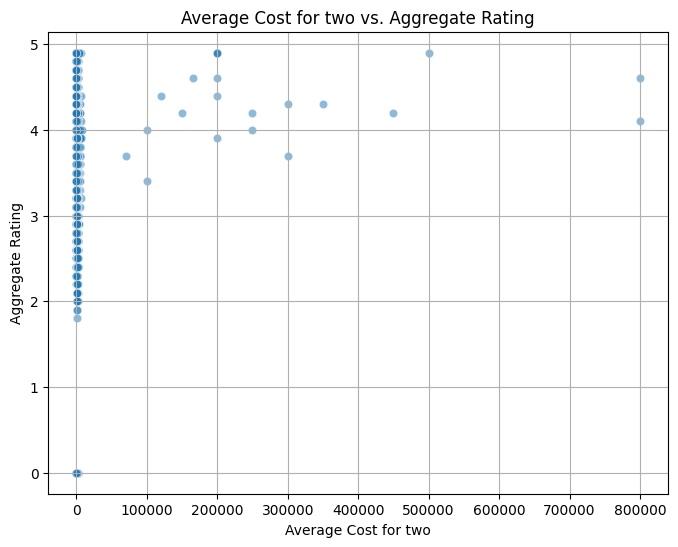

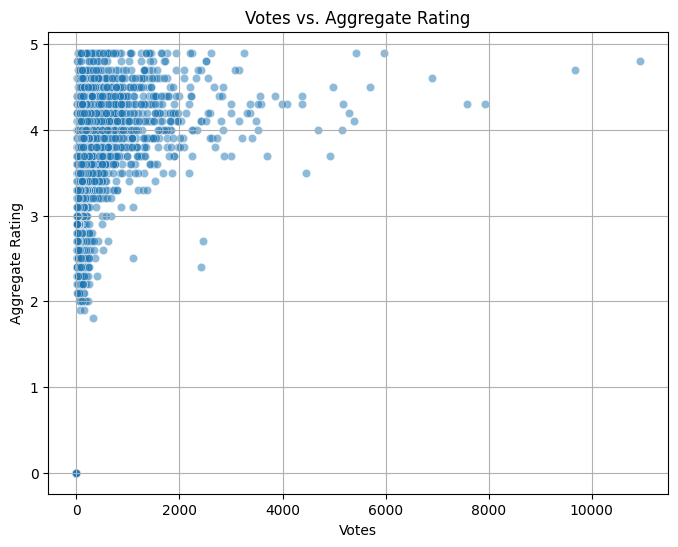

In [42]:
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='Aggregate rating', alpha=0.5)
    plt.title(f'{feature} vs. Aggregate Rating')
    plt.xlabel(feature)
    plt.ylabel('Aggregate Rating')
    plt.grid(True)
    plt.show()

* For numerical features, we can create scatter plots to visualize how the target variable changes with respect to each feature.

In [43]:
# Visualize categorical features vs. target variable (aggregate rating)
cat_features = ['Price range', 'Has Table booking', 'Has Online delivery']  # Add more categorical features if needed

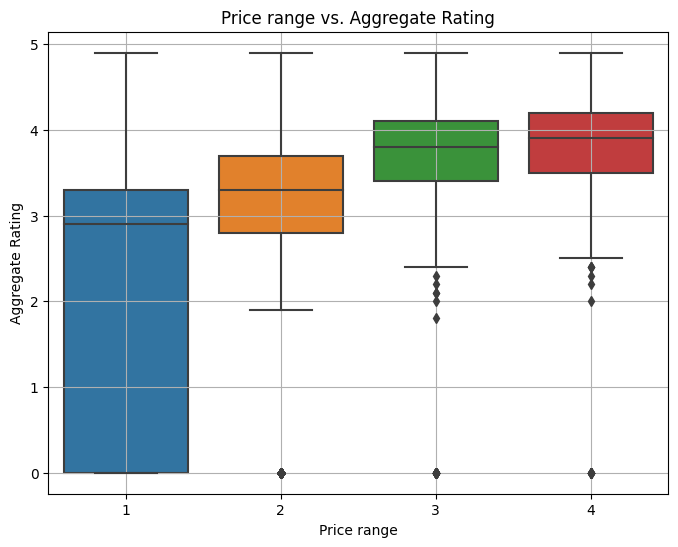

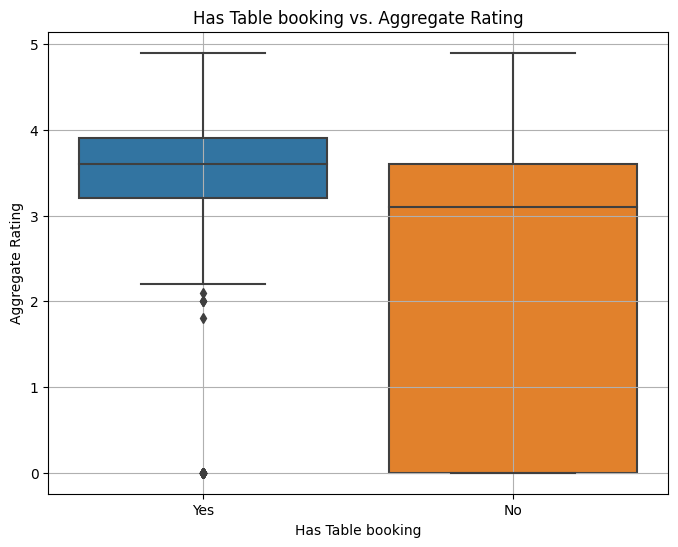

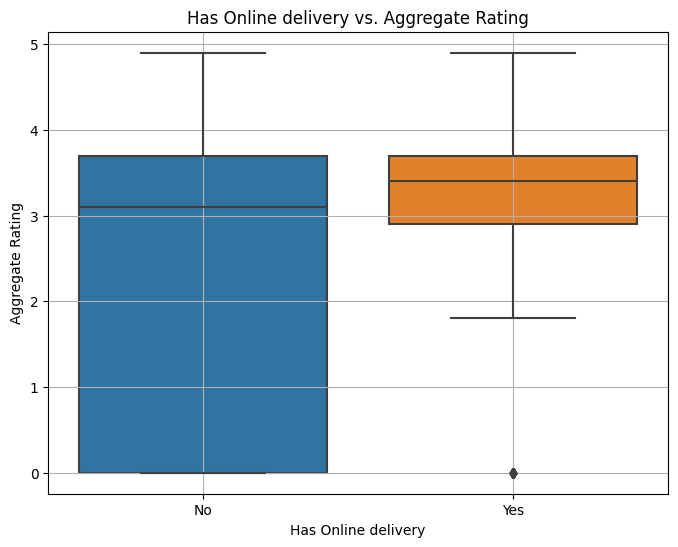

In [44]:
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature, y='Aggregate rating')
    plt.title(f'{feature} vs. Aggregate Rating')
    plt.xlabel(feature)
    plt.ylabel('Aggregate Rating')
    plt.grid(True)
    plt.show()

* For categorical features, we can use box plots or bar plots to compare the distribution of the target variable across different categories.